1. Повнозв'язані нейронні мережі

Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

  
url='https://drive.google.com/file/d/1xKY4nnik_Fon4D6eBdJ7TCzDTlzKWPyJ/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_csv(url_, sep=';')

data.head()



,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [44]:
data = data.drop([
    'cap-surface',
    'does-bruise-or-bleed',
    'gill-spacing',
    'spore-print-color',
    'habitat', 
    'spore-print-color',
    'veil-color',
    'veil-type' ,
    'stem-surface', 
    'stem-root'], axis = 1)


from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])
data.head()

,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,season
0,1,15.26,6,6,2,10,16.95,17.09,11,1,2,3
1,1,16.60,6,6,2,10,17.99,18.19,11,1,2,2
2,1,14.07,6,6,2,10,17.80,17.74,11,1,2,3
3,1,14.17,2,1,2,10,15.77,15.98,11,1,5,3
4,1,14.64,6,6,2,10,16.53,17.20,11,1,5,3


In [45]:
X = data.drop('class', axis=1)
y = data['class']
print(X.shape)
print(y.shape)

(61069, 11)
(61069,)


In [46]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
X_std = pd.DataFrame(data_scaled, columns=X.columns)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(42748, 11)
(42748,)


In [48]:
num_classes = len(np.unique(y_train))

model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [49]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.7235 - loss: 0.5193 - val_accuracy: 0.8925 - val_loss: 0.2573
Epoch 2/50
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2s 774us/step - accuracy: 0.8952 - loss: 0.2493 - val_accuracy: 0.9265 - val_loss: 0.1844
Epoch 3/50
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.9302 - loss: 0.1773 - val_accuracy: 0.9221 - val_loss: 0.1846
Epoch 4/50
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2s 769us/step - accuracy: 0.9514 - loss: 0.1277 - val_accuracy: 0.9702 - val_loss: 0.0907
Epoch 5/50
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step - accuracy: 0.9632 - loss: 0.0988 - val_accuracy: 0.9731 - val_loss: 0.0774
Epoch 6/50
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step - accuracy: 0.9725 - loss: 0.0776 - val_accuracy: 0.9766 - val_loss: 0.0698
Epoch 7/50
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.9792 - loss: 0.0635 - val_accuracy: 0.9858 - val_loss: 0.0456
Epoch 8/50
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step - accuracy: 0.9807 -

573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.9935 - loss: 0.0198
Test Accuracy: 0.99


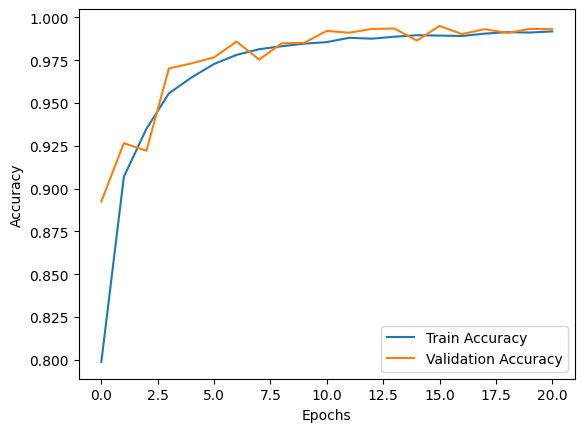

In [51]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()